In [95]:
!pip install wordcloud

In [96]:
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

In [97]:
#import dataset

df = pd.read_csv('cleaned_air_canada_reviews.csv')

In [98]:
df.head()

,Review,Cleaned_review
0,✅Trip Verified| Delay a flight 6 times befor...,delay flight time announc cancel custom servic...
1,✅Trip Verified| This is the worst airline in...,worst airlin world never time servic aw plane ...
2,Not Verified| Airline is strict with carryon...,verifi airlin strict carryon limit size even i...
3,Not Verified| A review to agent Marta at the...,verifi review agent marta custom servic desk a...
4,✅Trip Verified| On the way to Istanbul the fli...,way istanbul flight orlando delay make connect...


In [99]:
corpus = df['Cleaned_review']
corpus

0      delay flight time announc cancel custom servic...
1      worst airlin world never time servic aw plane ...
2      verifi airlin strict carryon limit size even i...
3      verifi review agent marta custom servic desk a...
4      way istanbul flight orlando delay make connect...
                             ...                        
995    quebec toronto seat space seat narrow knee tou...
996    london toronto found trip air canada b er pret...
997    brisban vancouv trip sept pleasant comfort tri...
998    montreal tokyo welcom staff montreal airport u...
999    atlanta toronto embraer check staff welcom bas...
Name: Cleaned_review, Length: 1000, dtype: object

In [100]:
# Combine all the cleaned reviews into a single string
all_reviews = ' '.join(corpus)


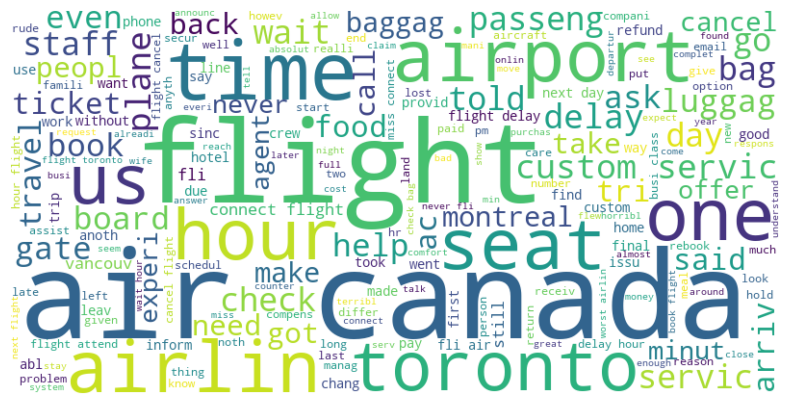

In [101]:
# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the word cloud
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis lines and labels
plt.show()

# Sentiment Analysis

In [102]:
#import libraries
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [103]:
#import data
df =pd.read_csv('cleaned_air_canada_reviews.csv')
df

,Review,Cleaned_review
0,✅Trip Verified| Delay a flight 6 times befor...,delay flight time announc cancel custom servic...
1,✅Trip Verified| This is the worst airline in...,worst airlin world never time servic aw plane ...
2,Not Verified| Airline is strict with carryon...,verifi airlin strict carryon limit size even i...
3,Not Verified| A review to agent Marta at the...,verifi review agent marta custom servic desk a...
4,✅Trip Verified| On the way to Istanbul the fli...,way istanbul flight orlando delay make connect...
...,...,...
995,✅Trip Verified| Quebec to Toronto. The seats ...,quebec toronto seat space seat narrow knee tou...
996,Not Verified| London to Toronto. I found this...,london toronto found trip air canada b er pret...
997,✅Trip Verified| Brisbane to Vancouver. My tri...,brisban vancouv trip sept pleasant comfort tri...
998,✅Trip Verified| Montreal to Tokyo. The welcom...,montreal tokyo welcom staff montreal airport u...


In [104]:
data =df['Cleaned_review']
data

0      delay flight time announc cancel custom servic...
1      worst airlin world never time servic aw plane ...
2      verifi airlin strict carryon limit size even i...
3      verifi review agent marta custom servic desk a...
4      way istanbul flight orlando delay make connect...
                             ...                        
995    quebec toronto seat space seat narrow knee tou...
996    london toronto found trip air canada b er pret...
997    brisban vancouv trip sept pleasant comfort tri...
998    montreal tokyo welcom staff montreal airport u...
999    atlanta toronto embraer check staff welcom bas...
Name: Cleaned_review, Length: 1000, dtype: object

In [105]:
type(data)

pandas.core.series.Series

In [106]:
#initialize analyser

sent_analyzer = SentimentIntensityAnalyzer()

In [107]:
#define function 

def sentiment_score(review):
    return sent_analyzer.polarity_scores(review)

In [108]:
#apply sentiment analysis to cleaned review

df['sentiment_score'] = df['Cleaned_review'].apply(sentiment_score)
df.head()

,Review,Cleaned_review,sentiment_score
0,✅Trip Verified| Delay a flight 6 times befor...,delay flight time announc cancel custom servic...,"{'neg': 0.083, 'neu': 0.736, 'pos': 0.181, 'co..."
1,✅Trip Verified| This is the worst airline in...,worst airlin world never time servic aw plane ...,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp..."
2,Not Verified| Airline is strict with carryon...,verifi airlin strict carryon limit size even i...,"{'neg': 0.063, 'neu': 0.863, 'pos': 0.074, 'co..."
3,Not Verified| A review to agent Marta at the...,verifi review agent marta custom servic desk a...,"{'neg': 0.041, 'neu': 0.654, 'pos': 0.306, 'co..."
4,✅Trip Verified| On the way to Istanbul the fli...,way istanbul flight orlando delay make connect...,"{'neg': 0.145, 'neu': 0.798, 'pos': 0.057, 'co..."


In [109]:
score =[]

for review in df['Cleaned_review']:
    sent_score = sentiment_score(review)
    score.append(sent_score)

In [110]:
score[0] ,type(score)

({'neg': 0.083, 'neu': 0.736, 'pos': 0.181, 'compound': 0.9756}, list)

In [111]:
score[0]['compound']

0.9756

In [112]:
#extract compound score

df['Compound_score'] =df['sentiment_score'].apply(lambda x: x['compound'])
df.head()

,Review,Cleaned_review,sentiment_score,Compound_score
0,✅Trip Verified| Delay a flight 6 times befor...,delay flight time announc cancel custom servic...,"{'neg': 0.083, 'neu': 0.736, 'pos': 0.181, 'co...",0.9756
1,✅Trip Verified| This is the worst airline in...,worst airlin world never time servic aw plane ...,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",-0.7506
2,Not Verified| Airline is strict with carryon...,verifi airlin strict carryon limit size even i...,"{'neg': 0.063, 'neu': 0.863, 'pos': 0.074, 'co...",0.2500
3,Not Verified| A review to agent Marta at the...,verifi review agent marta custom servic desk a...,"{'neg': 0.041, 'neu': 0.654, 'pos': 0.306, 'co...",0.9325
4,✅Trip Verified| On the way to Istanbul the fli...,way istanbul flight orlando delay make connect...,"{'neg': 0.145, 'neu': 0.798, 'pos': 0.057, 'co...",-0.8885


In [113]:
#Classify the review base on the compound score

df['Sentiment'] =df['Compound_score'].apply(lambda x:'positive' if x>=0.05 else('negative' if x<=-0.05 else 'neutral'))
df.head()

,Review,Cleaned_review,sentiment_score,Compound_score,Sentiment
0,✅Trip Verified| Delay a flight 6 times befor...,delay flight time announc cancel custom servic...,"{'neg': 0.083, 'neu': 0.736, 'pos': 0.181, 'co...",0.9756,positive
1,✅Trip Verified| This is the worst airline in...,worst airlin world never time servic aw plane ...,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",-0.7506,negative
2,Not Verified| Airline is strict with carryon...,verifi airlin strict carryon limit size even i...,"{'neg': 0.063, 'neu': 0.863, 'pos': 0.074, 'co...",0.2500,positive
3,Not Verified| A review to agent Marta at the...,verifi review agent marta custom servic desk a...,"{'neg': 0.041, 'neu': 0.654, 'pos': 0.306, 'co...",0.9325,positive
4,✅Trip Verified| On the way to Istanbul the fli...,way istanbul flight orlando delay make connect...,"{'neg': 0.145, 'neu': 0.798, 'pos': 0.057, 'co...",-0.8885,negative


In [118]:
#Save the file with Sentiments

df.to_csv('sentimented_air_canada_reviews.csv' , index=False)

In [114]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

negative    591
positive    377
neutral      32
Name: Sentiment, dtype: int64

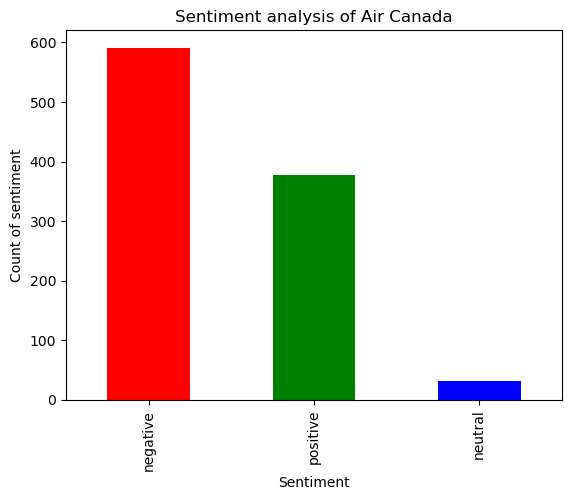

In [115]:
#bar chart

sentiment_counts.plot(kind='bar', color=[ 'red','green', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count of sentiment')
plt.title('Sentiment analysis of Air Canada')
plt.show()

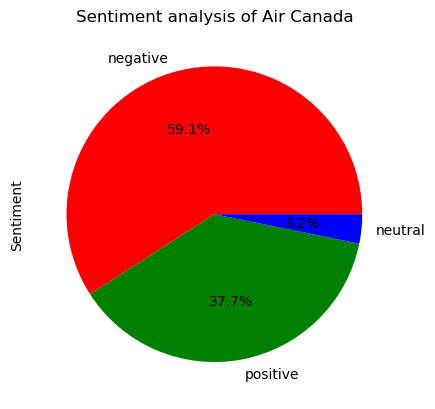

In [117]:
#pie chart

sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=[ 'red','green', 'blue'])
plt.title('Sentiment analysis of Air Canada')
plt.show()

# Sentiment Analysis Modeling


### In here, machine learning approach with a simple Logistic Regression model will be use. 
### The goal is to classify the reviews as either positive or negative based on the text content.

In [122]:
#import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

In [124]:
#Load cleaned and preprocessed data

df =pd.read_csv('sentimented_air_canada_reviews.csv')
df.head()

,Review,Cleaned_review,sentiment_score,Compound_score,Sentiment
0,✅Trip Verified| Delay a flight 6 times befor...,delay flight time announc cancel custom servic...,"{'neg': 0.083, 'neu': 0.736, 'pos': 0.181, 'co...",0.9756,positive
1,✅Trip Verified| This is the worst airline in...,worst airlin world never time servic aw plane ...,"{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",-0.7506,negative
2,Not Verified| Airline is strict with carryon...,verifi airlin strict carryon limit size even i...,"{'neg': 0.063, 'neu': 0.863, 'pos': 0.074, 'co...",0.2500,positive
3,Not Verified| A review to agent Marta at the...,verifi review agent marta custom servic desk a...,"{'neg': 0.041, 'neu': 0.654, 'pos': 0.306, 'co...",0.9325,positive
4,✅Trip Verified| On the way to Istanbul the fli...,way istanbul flight orlando delay make connect...,"{'neg': 0.145, 'neu': 0.798, 'pos': 0.057, 'co...",-0.8885,negative


In [125]:
#Define independance and dependance variables

X =df['Cleaned_review']
y =df['Sentiment']

In [126]:
#Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
X_train.shape, X_test.shape

((800,), (200,))

In [130]:
# Convert text data to numerical data using CountVectorizer
vectorizer =CountVectorizer(max_features=1500)

X_train_vectorized =vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()


In [131]:
X_train_vectorized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [134]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_vectorized, y_train)

# Predict the sentiments for the test data
y_pred = model.predict(X_test_vectorized)

In [135]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 72.50%
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.91      0.80       113
     neutral       0.00      0.00      0.00         8
    positive       0.78      0.53      0.63        79

    accuracy                           0.72       200
   macro avg       0.49      0.48      0.48       200
weighted avg       0.71      0.72      0.70       200

Confusion Matrix:
[[103   0  10]
 [  6   0   2]
 [ 37   0  42]]


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
